In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('ditaAI_dataTraining.csv')

In [102]:
df['training_data'] = df['training_data'].apply(lambda x: x.lower())
df['tagging'] = df['tagging'].apply(lambda x: x.lower())
tagging = df['tagging'].str.cat(sep = ', ')

In [103]:
tagging = list(set(tagging.split(', ')))

In [104]:
t = pd.DataFrame(tagging, columns=['Tags'])
t['Tags'] = t['Tags'].apply(lambda x: x.strip())
t.sort_values(by=['Tags'], inplace=True)
t.to_csv('datasets/all_labels.csv', index=False)

In [105]:
tagging = t['Tags'].tolist()

In [106]:
c1 = ['questions', 'tagging']
c1.extend(tagging)
t1 = pd.DataFrame(columns=c1)
t1['questions'] = df['training_data']
t1['tagging'] = df['tagging']
t1.fillna(0, inplace=True)

In [107]:
def changeLabelValue(x):
    tags = x['tagging'].split(', ')
    if len(tags) > 1:
        for tag in tags:
            x[tag.strip()] = 1
    else:
        x[x['tagging']] = 1
    return x

In [108]:
new_row = []
def splitNewRow(x):
    columns = x.keys()[1:]
    faqs = x['questions'].split(',')
    if len(faqs) > 1:
        for index, faq in enumerate(faqs):
            if index == 0:
                x['questions'] = faq
                continue
            data = [faq]
            data.extend(x[columns])
            new_row.append(data)
    return x

In [109]:
t1 = t1.apply(changeLabelValue, axis=1)

In [110]:
t1 = t1.drop(['tagging'], axis=1)

In [111]:
t1

,questions,akses visa,aplikasi,backup,byod,cara connect,cara instal aplikasi,certificate,connect intranet,connect vpn,...,unlock,unlock domain,update,user,user domain,visa,vpn,waktu dsc,web,wifi
0,bagaimana cara connect wifi dan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,connect wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,wifi bermasalah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,saya ingin konek ke visa tapi tidak bisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,bagaimana cara connect wifi di visa?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,bagaimana cara membuat komplain terkait visa m...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,panduan menggunakan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
470,panduan membuat komplain visa management,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,panduan cara membuat komplain visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
t1 = t1.apply(splitNewRow, axis=1)

In [113]:
t2 = pd.DataFrame(new_row, columns=t1.columns)

In [114]:
t1 = t1.append(t2)

/tmp/ipykernel_35430/3994074905.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t1 = t1.append(t2)


In [115]:
# t1.to_csv('new_dataset.csv', index=False)
t1

,questions,akses visa,aplikasi,backup,byod,cara connect,cara instal aplikasi,certificate,connect intranet,connect vpn,...,unlock,unlock domain,update,user,user domain,visa,vpn,waktu dsc,web,wifi
0,bagaimana cara connect wifi dan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,connect wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,wifi bermasalah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,saya ingin konek ke visa tapi tidak bisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,bagaimana cara connect wifi di visa?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,bagaimana cara membuat komplain terkait visa m...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,panduan menggunakan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
470,panduan membuat komplain visa management,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,panduan cara membuat komplain visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

In [117]:
threshold = 10

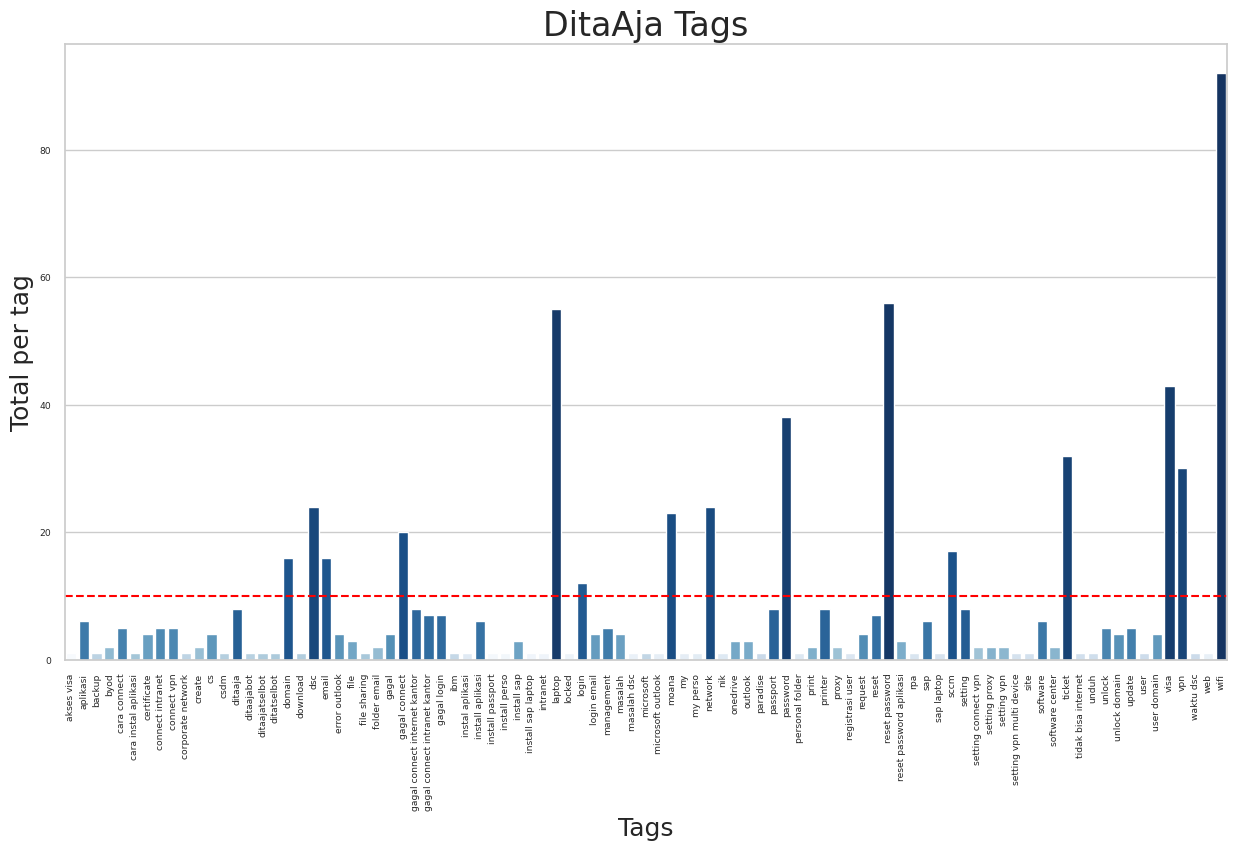

In [118]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.6)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  
sns.barplot(x=bar_plot['cat'], y=bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("DitaAja Tags", fontsize=24)
plt.ylabel('Total per tag', fontsize=18)
plt.xlabel('Tags', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [119]:
columns = t1.columns[1:]
selected_data = bar_plot[bar_plot['count'] >= threshold]
categories = selected_data['cat'].values

drop_tag = []
for i in t1.columns[1:]:
    if i not in categories:
        drop_tag.append(i)

t1 = t1.drop(drop_tag, axis=1)

In [120]:
t1 = t1.loc[(t1[t1.columns[1:]].T != 0).any()]

In [121]:
import csv
t1.to_csv('datasets/new_dataset.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)

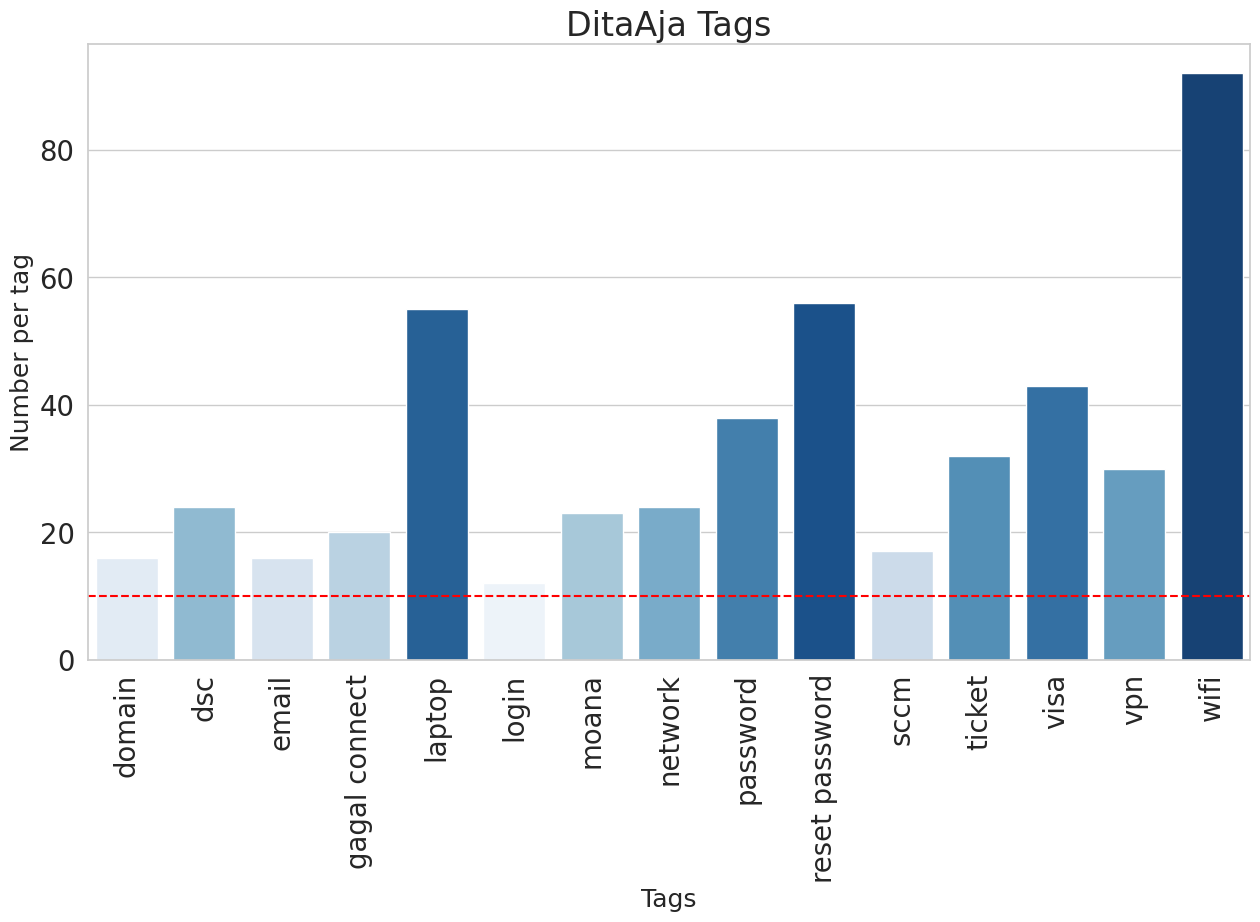

In [122]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
selected_columns = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.8)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  
sns.barplot(x=bar_plot['cat'], y=bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("DitaAja Tags", fontsize=24)
plt.ylabel('Number per tag', fontsize=18)
plt.xlabel('Tags', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [123]:
df2 = pd.read_csv('ditaAI_dataTest.csv')

In [124]:
df2['training_data'] = df2['training_data'].apply(lambda x: x.lower())
df2['tagging'] = df2['tagging'].apply(lambda x: x.lower())

In [125]:
c1 = ['questions', 'tagging']
c1.extend(selected_columns)
t1 = pd.DataFrame(columns=c1)
t1['questions'] = df2['training_data']
t1['tagging'] = df2['tagging']
t1.fillna(0, inplace=True)
new_row = []

In [126]:
t1 = t1.apply(changeLabelValue, axis=1)

In [127]:
t1 = t1.drop(['tagging'], axis=1)

In [128]:
t1 = t1.apply(splitNewRow, axis=1)

In [129]:
t2 = pd.DataFrame(new_row, columns=t1.columns)
t1 = t1.append(t2)

/tmp/ipykernel_35430/4157487551.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t1 = t1.append(t2)


In [130]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

In [131]:
t1 = t1.loc[(t1[t1.columns[1:]].T != 0).any()]

In [132]:
import csv
t1.to_csv('datasets/data_test.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)